<div style="background-color: red;">
  <h1 style="font-family: Arial; color: cyan; text-align: center;">Importing libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from dotenv import load_dotenv
import os
from collections import Counter

load_dotenv()

True

<div style="background-color: red;">
  <h1 style="font-family: Arial; color: cyan; text-align: center;">Reading Dataframe

In [2]:
df = pd.read_csv('car_price_prediction.csv')
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


<div style="background-color: red;">
  <h1 style="font-family: Arial; color: cyan; text-align: center;"> Understanding the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

<center><b> No Null Records</center></b>

In [4]:
df.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [5]:
df.describe(include=['O'])

,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Doors,Wheel,Color
count,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237
unique,559,65,1590,11,2,7,107,7687,4,3,3,2,16
top,-,HYUNDAI,Prius,Sedan,Yes,Petrol,2,0 km,Automatic,Front,04-May,Left wheel,Black
freq,5819,3769,1083,8736,13954,10150,3916,721,13514,12874,18332,17753,5033


<b> Observations :</b><br> Doors - Imbalanced feature <br> Wheels - Imbalanced feature

<div style="background-color: red;">
  <h1 style="font-family: Arial; color: cyan; text-align: center;"> Cleaning Data

<center><b>Dropping duplicate records</center></b>

In [6]:
df[df.duplicated() == True].shape

(313, 18)

In [7]:
df.drop_duplicates(inplace=True, ignore_index=True)

In [8]:
df[df.duplicated() == True].shape

(0, 18)

<center><b>Dropping Features with more than 90% Imbalance in classes</b></center>

<div style="background-color: red;">
  <h1 style="font-family: Arial; color: cyan; text-align: center;">EDA

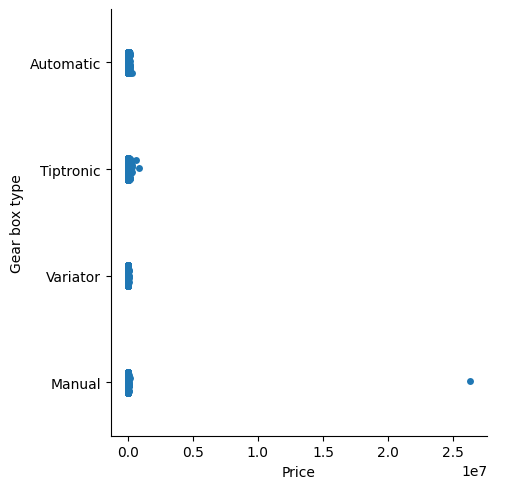

In [9]:
sns.catplot(x=df['Price'], y=df['Gear box type'])

<center>Outliers detected which are restricting from getting insights from data

<div style="background-color: red;">
  <h1 style="font-family: Arial; color: cyan; text-align: center;">Outlier Handling

In [10]:
#Using IQR method to handle Outliers
def Outlier_counter(data, col):
    q1 = np.percentile(data[col], 25)
    q3 = np.percentile(data[col], 75)
    IQR = q3-q1
    lower_bound = q1-IQR*1.5
    upper_bound = q3+IQR*1.5
    outliers = len(data[(data[col] < lower_bound) | (data[col] > upper_bound)])
    return outliers, lower_bound, upper_bound

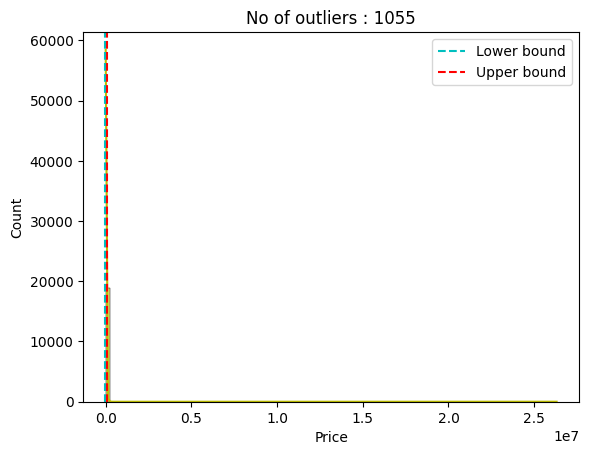

In [11]:
sns.histplot(df['Price'],color='y', kde=True, bins=100)
outliers_cnt, lb, ub = Outlier_counter(df, 'Price')
plt.title(f'No of outliers : {outliers_cnt}')
plt.axvline(lb, c='c', linestyle='--', label='Lower bound')
plt.axvline(ub, c='r', linestyle='--', label='Upper bound')
plt.legend()
plt.show()

In [12]:
def Outlier_trimmer(data, col):
    q1 = np.percentile(data[col], 25)
    q3 = np.percentile(data[col], 75)
    IQR = q3-q1
    lower_bound = q1-IQR*1.5
    upper_bound = q3+IQR*1.5
    filtered_data = data[(data[col] > lower_bound) & (data[col] < upper_bound)]
    return filtered_data

In [13]:
new_df = Outlier_trimmer(df, 'Price')
new_df.reset_index(inplace=True)
new_df.shape

(17869, 19)

<Axes: xlabel='Price', ylabel='Count'>

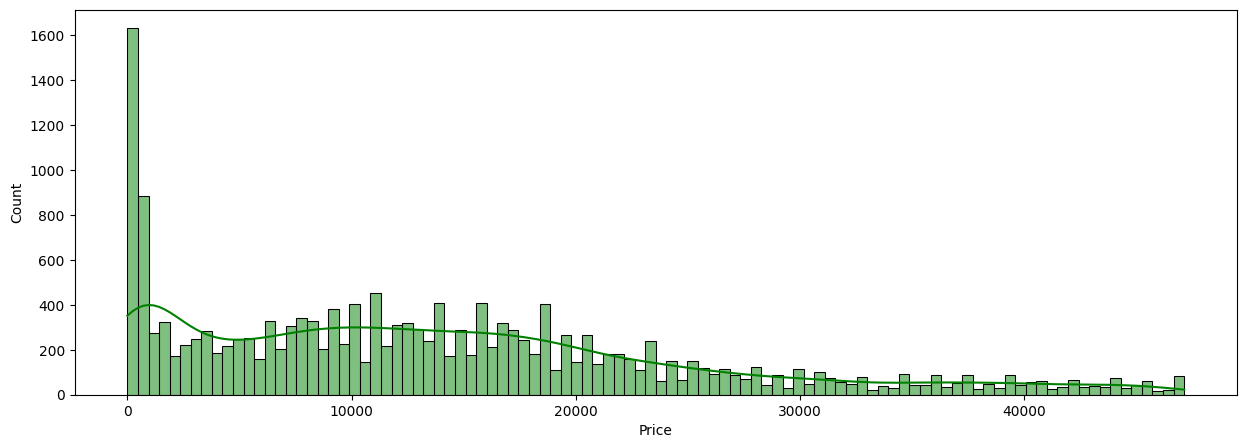

In [14]:
plt.figure(figsize=(15,5))
sns.histplot(new_df['Price'], color='g', kde=True, bins=100)

In [15]:
#checking if any imbalanced data is affected by trimming
lost = pd.DataFrame(columns=['Column', 'Old Data', 'New Data', 'Uniques Lost'])
for col in df.columns:
    diff = len(df[col].unique()) - len(new_df[col].unique())
    lost.loc[len(lost.index)] = [col, len(df[col].unique()), len(new_df[col].unique()), diff]
lost

,Column,Old Data,New Data,Uniques Lost
0,ID,18924,17869,1055
1,Price,2315,1855,460
2,Levy,559,533,26
3,Manufacturer,65,61,4
4,Model,1590,1498,92
5,Prod. year,54,52,2
6,Category,11,11,0
7,Leather interior,2,2,0
8,Fuel type,7,7,0
9,Engine volume,107,103,4


<b>we can see the columns which have very few unique values are are not getting imbalanced i.e. no elimination of particular one class is done that means those were outliers and not data of certain value in a certain feature

<div style="background-color: red;">
  <h1 style="font-family: Arial; color: cyan; text-align: center;">EDA (Continued)

In [16]:
new_df

,index,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17864,18919,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
17865,18920,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
17866,18921,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
17867,18922,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [17]:
#from df.describe we were able to figure out these two columns are highly imbalanced 
new_df['Doors'] = new_df['Doors'].map({'04-May':4,'02-Mar':2, '>5': '5+'})
new_df['Wheel'] = new_df['Wheel'].map({'Right-hand drive': 'Right steer','Left wheel': 'Left steer'})

C:\Users\antho\AppData\Local\Temp\ipykernel_14156\4188632352.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Doors'] = new_df['Doors'].map({'04-May':4,'02-Mar':2, '>5': '5+'})
C:\Users\antho\AppData\Local\Temp\ipykernel_14156\4188632352.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Wheel'] = new_df['Wheel'].map({'Right-hand drive': 'Right steer','Left wheel': 'Left steer'})


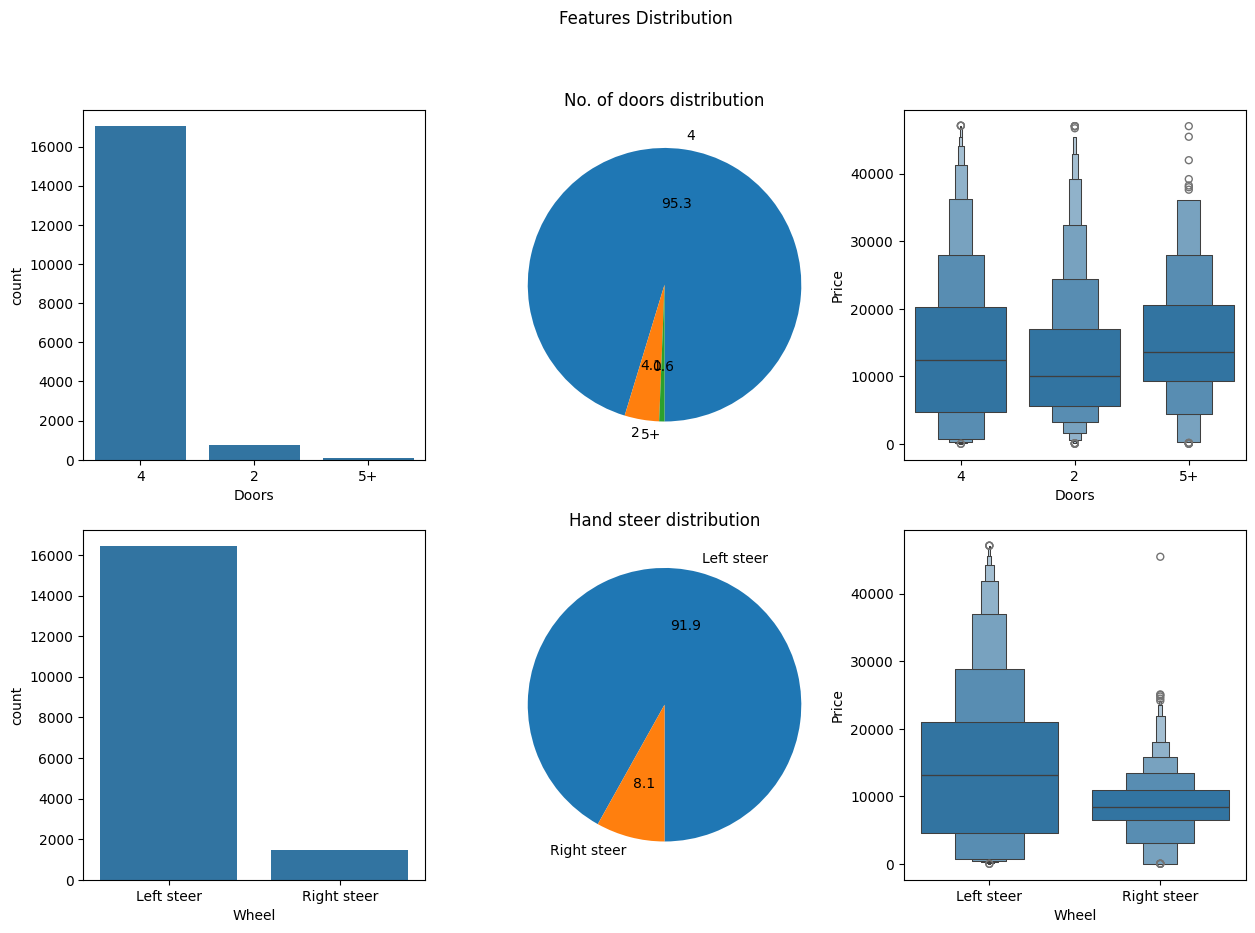

In [18]:
fig, axes = plt.subplots(2,3,figsize=(15,10))
doors_dist = new_df['Doors'].value_counts()
wheels_dist = new_df['Wheel'].value_counts()
fig.suptitle('Features Distribution')
sns.countplot(x=new_df['Doors'], ax=axes[0,0])
sns.countplot(x=new_df['Wheel'], ax=axes[1,0])
sns.boxenplot(y=new_df['Price'],x=new_df['Doors'], ax=axes[0,2])
sns.boxenplot(y=new_df['Price'],x=new_df['Wheel'], ax=axes[1,2])
axes[0,1].set_title('No. of doors distribution')
axes[0,1].pie(x=doors_dist.values,labels=doors_dist.index, autopct='%.1f',startangle=270)
axes[1,1].set_title('Hand steer distribution')
axes[1,1].pie(x=wheels_dist.values,labels=wheels_dist.index, autopct='%.1f',startangle=270)
plt.show()

<b>Conclustion:</b><br>1)The Features Wheel and Doors are highly imbalanced .<br>
2) Also the featurewise price distribution is majorly centered in the same price range making the features classes not distinct from each other, leading to have no effect to the target variable and thus dropping both the features.

In [19]:
new_df.drop(columns=['Doors', 'Wheel'], inplace=True)
new_df.head()

C:\Users\antho\AppData\Local\Temp\ipykernel_14156\3927733825.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.drop(columns=['Doors', 'Wheel'], inplace=True)


,index,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Color,Airbags
0,0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,Silver,12
1,1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,Black,8
2,2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,Black,2
3,3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,White,0
4,4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,Silver,4


In [20]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17869 entries, 0 to 17868
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             17869 non-null  int64  
 1   ID                17869 non-null  int64  
 2   Price             17869 non-null  int64  
 3   Levy              17869 non-null  object 
 4   Manufacturer      17869 non-null  object 
 5   Model             17869 non-null  object 
 6   Prod. year        17869 non-null  int64  
 7   Category          17869 non-null  object 
 8   Leather interior  17869 non-null  object 
 9   Fuel type         17869 non-null  object 
 10  Engine volume     17869 non-null  object 
 11  Mileage           17869 non-null  object 
 12  Cylinders         17869 non-null  float64
 13  Gear box type     17869 non-null  object 
 14  Drive wheels      17869 non-null  object 
 15  Color             17869 non-null  object 
 16  Airbags           17869 non-null  int64 

As seen above few columns can bee seen as numerical columns but are addressed as categorical type in .info method converting those columns to proper format

In [21]:
#extracting value which is making the 'Levy' feature object type
for unique in new_df['Levy'].unique():
    try : 
        int(unique)
    except:
        print(unique)

-


<b>Levy -</b> This column refers to any additional taxes or fees associated with the vehicle.<br>
This means the rows with '-' value refers that there is no additional tax associated with that vehicle thus we'll replace it with 0

In [22]:
new_df['Levy'] = new_df['Levy'].replace('-', 0)
new_df

C:\Users\antho\AppData\Local\Temp\ipykernel_14156\2481043151.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Levy'] = new_df['Levy'].replace('-', 0)


,index,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Color,Airbags
0,0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,Silver,12
1,1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,Black,8
2,2,45774419,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,Black,2
3,3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,White,0
4,4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17864,18919,45798355,8467,0,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,Silver,5
17865,18920,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,Red,8
17866,18921,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,Grey,4
17867,18922,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,Black,4


In [23]:
new_df['Levy'] = new_df['Levy'].astype(int)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17869 entries, 0 to 17868
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             17869 non-null  int64  
 1   ID                17869 non-null  int64  
 2   Price             17869 non-null  int64  
 3   Levy              17869 non-null  int32  
 4   Manufacturer      17869 non-null  object 
 5   Model             17869 non-null  object 
 6   Prod. year        17869 non-null  int64  
 7   Category          17869 non-null  object 
 8   Leather interior  17869 non-null  object 
 9   Fuel type         17869 non-null  object 
 10  Engine volume     17869 non-null  object 
 11  Mileage           17869 non-null  object 
 12  Cylinders         17869 non-null  float64
 13  Gear box type     17869 non-null  object 
 14  Drive wheels      17869 non-null  object 
 15  Color             17869 non-null  object 
 16  Airbags           17869 non-null  int64 

C:\Users\antho\AppData\Local\Temp\ipykernel_14156\540604728.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Levy'] = new_df['Levy'].astype(int)


<div style="background-color: red;">
  <h1 style="font-family: Arial; color: cyan; text-align: center;">Feature Engineering

In [24]:
#extracting value which is making the 'Engine Volume' feature object type
for unique in new_df['Engine volume'].unique():
    try : 
        float(unique)
    except:
        print(unique)

2.0 Turbo
2.2 Turbo
3.0 Turbo
1.4 Turbo
1.5 Turbo
1.6 Turbo
2.3 Turbo
2.8 Turbo
1.8 Turbo
2.4 Turbo
3.5 Turbo
3.2 Turbo
1.3 Turbo
2.5 Turbo
1.9 Turbo
0.2 Turbo
4.8 Turbo
1.2 Turbo
1.7 Turbo
4.6 Turbo
2.7 Turbo
2.9 Turbo
4.4 Turbo
3.7 Turbo
2.1 Turbo
0.7 Turbo
0.6 Turbo
5.5 Turbo
3.6 Turbo
1.0 Turbo
4.7 Turbo
4.5 Turbo
0.8 Turbo
4.2 Turbo
5.0 Turbo
6.3 Turbo
5.4 Turbo
0.3 Turbo
1.1 Turbo


We can create two features <br>
1)"Engine Volume" which contains just the engine volume <br>
2)"Turbo" can be a binary feature determining the presence of Turbo(yes/no)

In [25]:
def eng_vol_handler():
    turbos = list()
    values = list()
    for val in new_df['Engine volume']:
        try : 
            val = float(val)
            turbo = 'No'
        except:
            val = val.split(' ')[0]
            turbo = 'Yes'
        turbos.append(turbo)
        values.append(val)
    return turbos,values

In [26]:
new_df['Turbo'], new_df['Engine Volume']= eng_vol_handler()
new_df


C:\Users\antho\AppData\Local\Temp\ipykernel_14156\1628160223.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Turbo'], new_df['Engine Volume']= eng_vol_handler()


C:\Users\antho\AppData\Local\Temp\ipykernel_14156\1628160223.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Turbo'], new_df['Engine Volume']= eng_vol_handler()


,index,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Color,Airbags,Turbo,Engine Volume
0,0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,Silver,12,No,3.5
1,1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,Black,8,No,3.0
2,2,45774419,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,Black,2,No,1.3
3,3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,White,0,No,2.5
4,4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,Silver,4,No,1.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17864,18919,45798355,8467,0,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,Silver,5,Yes,2.0
17865,18920,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,Red,8,No,2.4
17866,18921,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,Grey,4,No,2.0
17867,18922,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,Black,4,No,2.0


In [27]:
#now we can drop the old 'Engine volume variable
new_df.drop(columns=['Engine volume'], inplace=True)
new_df

C:\Users\antho\AppData\Local\Temp\ipykernel_14156\1101128518.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.drop(columns=['Engine volume'], inplace=True)


,index,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Color,Airbags,Turbo,Engine Volume
0,0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,186005 km,6.0,Automatic,4x4,Silver,12,No,3.5
1,1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,192000 km,6.0,Tiptronic,4x4,Black,8,No,3.0
2,2,45774419,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,200000 km,4.0,Variator,Front,Black,2,No,1.3
3,3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,168966 km,4.0,Automatic,4x4,White,0,No,2.5
4,4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,91901 km,4.0,Automatic,Front,Silver,4,No,1.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17864,18919,45798355,8467,0,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,300000 km,4.0,Manual,Rear,Silver,5,Yes,2.0
17865,18920,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,161600 km,4.0,Tiptronic,Front,Red,8,No,2.4
17866,18921,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,116365 km,4.0,Automatic,Front,Grey,4,No,2.0
17867,18922,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,51258 km,4.0,Automatic,Front,Black,4,No,2.0


In [28]:
# Mileage feature contains km at the end which makes the feature object type removing 'km' from the records can make it numerical feature
def mileage_handler(val):
    val = int(val[:-2].strip())
    return val

In [29]:
new_df['Mileage']= new_df['Mileage'].apply(mileage_handler)
new_df

C:\Users\antho\AppData\Local\Temp\ipykernel_14156\925275603.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Mileage']= new_df['Mileage'].apply(mileage_handler)


,index,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Color,Airbags,Turbo,Engine Volume
0,0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,186005,6.0,Automatic,4x4,Silver,12,No,3.5
1,1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,192000,6.0,Tiptronic,4x4,Black,8,No,3.0
2,2,45774419,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,200000,4.0,Variator,Front,Black,2,No,1.3
3,3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,168966,4.0,Automatic,4x4,White,0,No,2.5
4,4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,91901,4.0,Automatic,Front,Silver,4,No,1.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17864,18919,45798355,8467,0,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,300000,4.0,Manual,Rear,Silver,5,Yes,2.0
17865,18920,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,161600,4.0,Tiptronic,Front,Red,8,No,2.4
17866,18921,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,116365,4.0,Automatic,Front,Grey,4,No,2.0
17867,18922,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,51258,4.0,Automatic,Front,Black,4,No,2.0


In [30]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17869 entries, 0 to 17868
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             17869 non-null  int64  
 1   ID                17869 non-null  int64  
 2   Price             17869 non-null  int64  
 3   Levy              17869 non-null  int32  
 4   Manufacturer      17869 non-null  object 
 5   Model             17869 non-null  object 
 6   Prod. year        17869 non-null  int64  
 7   Category          17869 non-null  object 
 8   Leather interior  17869 non-null  object 
 9   Fuel type         17869 non-null  object 
 10  Mileage           17869 non-null  int64  
 11  Cylinders         17869 non-null  float64
 12  Gear box type     17869 non-null  object 
 13  Drive wheels      17869 non-null  object 
 14  Color             17869 non-null  object 
 15  Airbags           17869 non-null  int64  
 16  Turbo             17869 non-null  object

In [31]:
numeric_features = list()
for col in new_df.columns:
    col_dtype = new_df[col].dtype
    if col_dtype != 'object':
        numeric_features.append(col)
numeric_features.pop(1)
numeric_features

['index', 'Price', 'Levy', 'Prod. year', 'Mileage', 'Cylinders', 'Airbags']

In [32]:
# # now we can plot the numerical features and see their correlation with the target feature
# fig, axes = plt.subplots(2, 3, figsize=(15,10), sharey='all')
# fig.tight_layout() 
# current_col = 0
# for i in range(2):
#     for j in range(3):
#         try:
#             sns.scatterplot(x=new_df[numeric_features[current_col]], y=new_df['Price'],hue=new_df['Leather interior'], ax=axes[i,j])
#             current_col+=1
#         except:
#             pass
# plt.show()

<b>Observation - </b>
<br>1)Clear outliers can be detected in Mileage, Levy, Cylinders and Production yr but in Mileage, Levy, Production yr features the Price range shared among the outliers is some specific price range which can be advantageous for making predictions while Cylinders feature has very few outliers and outliers seem to have high variance which can hinder the efficiency of the model.<br><b>Conclusion - </b>
<br>1)The ID feature shows correlation i.e. when the IDs are low the the price of the car is also on the lower side
<br>➤If we wouldve known on what basis the IDs have been assigned :<br>
&emsp;&emsp;✦We must check if the data is not sorted as per IDs, which can affect the data if splitted without shhuffling<br>
➤But since we dont know and supposing IDs are assigned as per the order of scrapping .<br>
&emsp;&emsp;✦We will drop the feature as it will lead the model to misinterpret prices affected by the IDs.<br>
2) The Price of a car is influenced by its year of production to a great extent, also when the production year is relatively on the newer side and price is low, its mostly when the car doesnt have leather interior (This will help to improve efficiency of the model).<br>
3) Dropping outliers based on Levy feature can be kept into consideration if the model is not performing well.

In [33]:
new_df.drop(columns=['ID'],inplace=True)
print(new_df.shape)
new_df.sample(7)

(17869, 17)


C:\Users\antho\AppData\Local\Temp\ipykernel_14156\3234964296.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.drop(columns=['ID'],inplace=True)


,index,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Color,Airbags,Turbo,Engine Volume
13508,14312,7997,1850,LEXUS,RX 450,2008,Jeep,Yes,Hybrid,244731,6.0,Automatic,Front,Black,12,No,3.5
14074,14911,19121,531,HYUNDAI,Elantra,2012,Sedan,Yes,Petrol,180000,4.0,Automatic,Front,Grey,4,No,1.6
3195,3383,13172,697,KIA,Forte,2015,Sedan,No,Petrol,72000,4.0,Manual,Front,White,6,No,1.8
9147,9676,2700,0,VOLKSWAGEN,Transporter,1980,Minivan,No,Petrol,111111,4.0,Manual,Rear,Beige,0,No,2.0
17578,18622,627,1604,MERCEDES-BENZ,E 350,2014,Sedan,Yes,Diesel,101424,8.0,Automatic,4x4,Grey,12,No,5.5
13074,13856,1882,382,HYUNDAI,Sonata,2014,Sedan,Yes,Hybrid,247835,4.0,Automatic,Front,Black,0,No,2.4
14330,15189,17249,1759,FORD,Transit 2.4,2006,Microbus,No,Diesel,190000,5.0,Manual,Rear,White,5,No,2.4


In [34]:
# organizing value counts in a way they are easy to visualize
vc =new_df['Fuel type'].value_counts()
fuel_vc =  dict()
for i in range(len(new_df['Fuel type'].value_counts())):
    if len(vc)%2 != 0:
        if i == 0 :
            fuel_vc[vc.index[i]] = vc.values[i]
        elif vc.values[i] == vc.values[-i]:
            fuel_vc[vc.index[i]] = vc.values[i]
            break
        else :
            fuel_vc[vc.index[i]] = vc.values[i]
            fuel_vc[vc.index[-i]] = vc.values[-i]

In [35]:
# #now we'll see which coloured car is mostly preferred and also their relation with target feature
# fig, axes = plt.subplots(1,2,figsize=(15,4))
# sns.boxenplot(y=new_df['Price'],x=new_df['Fuel type'], ax=axes[0])
# axes[1].pie(x=list(fuel_vc.values()),labels=list(fuel_vc.keys()),autopct=lambda pct: f"{int(pct/100.*sum(fuel_vc.values()))})",startangle=180)
# plt.show()

Observations:

1. Price Distribution:<br>
✦Diesel and Plug-in Hybrid vehicles have the highest mean and median prices, suggesting they are generally more expensive.<br>
✦CNG vehicles have the lowest mean and median prices, indicating they are typically the most affordable option.<br>
✦There's a significant gap between the most expensive (Plug-in Hybrid) and least expensive (CNG) fuel types.<br>
2. Price Skewness:<br>
✦For most fuel types, the mean is higher than the median, suggesting a right-skewed distribution (some high-priced vehicles pulling the average up).<br>
✦This skew is most pronounced in Petrol vehicles, with a larger difference between mean and median.<br>
3. Popularity:<br>
✦Petrol vehicles are by far the most common, making up the majority of the dataset (9,309 vehicles).<br>
✦Hybrid and Diesel vehicles are the next most common, with similar counts (3,495 and 3,634 respectively).<br>
✦Alternative fuel types (CNG, LPG, Plug-in Hybrid, Hydrogen) are much less common.<br>
4. Rare Fuel Types:<br>
✦Hydrogen vehicles are extremely rare in this dataset, with only 1 entry.<br>
✦Plug-in Hybrids are also relatively uncommon, with only 83 entries.<br>
5. Price Ranges:<br>
✦Traditional fuel types (Petrol, Diesel) occupy the middle price range.<br>
✦Alternative fuel types show more variation, from the cheapest (CNG) to some of the most expensive (Plug-in Hybrid, Hydrogen).<br>
6. Hybrid Pricing:<br>
✦Regular Hybrids are priced lower than conventional Petrol and Diesel vehicles on average.<br>
✦Plug-in Hybrids, however, are significantly more expensive than regular Hybrids.<br>
7. Sample Size Considerations:<br>
✦The low count for Hydrogen vehicles (just 1) means its price data is not statistically significant.<br>
✦The small sample size for Plug-in Hybrids (83) suggests their price data might be less reliable than for more common fuel types.<br>

Conclusion:<br>
We can group the fuel types 'Plug-in Hybrid' and 'Hydrogen' into a single category called 'Other' for several reasons:

1. Price range similarity: These fuel types share a similar price range in our dataset.
2. Low representation: Together, they account for less than 0.5% of the total records (1 Hydrogen and 83 Plug-in Hybrid vehicles out of the total dataset).
3. Model impact: Given their small representation, combining these categories is unlikely to significantly impact our model's performance.
4. Simplification: This grouping will simplify our analysis without sacrificing meaningful information.

By consolidating these less common fuel types, we can streamline our data while maintaining the integrity of our model and analysis.

In [36]:
new_df.replace({'Plug-in Hybrid':'Other', 'Hydrogen': 'Other'}, inplace=True)
new_df['Fuel type'].value_counts()

C:\Users\antho\AppData\Local\Temp\ipykernel_14156\2868692110.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.replace({'Plug-in Hybrid':'Other', 'Hydrogen': 'Other'}, inplace=True)


Fuel type
Petrol    9309
Diesel    3634
Hybrid    3495
LPG        878
CNG        469
Other       84
Name: count, dtype: int64

In [37]:
new_df.sample(7)

,index,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Color,Airbags,Turbo,Engine Volume
9998,10584,20385,0,TOYOTA,Prius,2012,Sedan,No,Petrol,190000,4.0,Automatic,Front,Blue,8,No,1.8
3395,3593,8781,0,HONDA,FIT,2007,Hatchback,No,Petrol,188000,4.0,Automatic,Front,Silver,7,No,1.3
15410,16329,5645,0,MERCEDES-BENZ,C 180,1995,Sedan,No,CNG,46777,4.0,Manual,Rear,Grey,2,No,1.8
13803,14624,6743,966,DAEWOO,Lacetti,2009,Sedan,Yes,Diesel,62227,4.0,Automatic,Front,White,4,No,2.0
3543,3751,314,1017,MERCEDES-BENZ,E 300,2017,Sedan,Yes,Petrol,26802,4.0,Automatic,Rear,Black,12,No,2.0
2147,2275,50,0,TOYOTA,Prius,2012,Sedan,Yes,Hybrid,150000,4.0,Automatic,Front,White,6,No,1.8
6197,6543,9879,831,GMC,TERRAIN,2018,Sedan,Yes,Petrol,51050,4.0,Automatic,Front,Blue,12,No,1.5


In [38]:
# fig, axes = plt.subplots(1,2, figsize=(15,5))
# sns.countplot(x=new_df['Color'], ax=axes[0])
# colors_vc = new_df['Color'].value_counts()
# fig.suptitle('Colour distribution of vehicles')
# axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
# axes[1].pie(x=colors_vc.values, labels=colors_vc.index, autopct='%.2f',
#             startangle=180)
# plt.show()

Observation :
The distribution of colours is uneven, few colours share a very small proportion of the distribution.

Conclusion :
We can group the colours sharing less then 1% length of the entire data as Others, as the colour has a very less correlation with our target variable .

In [39]:
vc =new_df['Color'].value_counts()
min_counts = len(new_df['Color'])/100 #1% of data length
color_vc =  dict()
color_vc_full = dict()

for i in range(len(vc)):
    if vc.values[i] < min_counts:
        color_vc[vc.index[i]] = vc.values[i]
        color_vc_full[vc.index[i]] = 0
    else:
        color_vc[vc.index[i]] = 0
        color_vc_full[vc.index[i]] = vc.values[i]

# plt.figure(figsize=(15,7))
# plt.bar(range(len(color_vc_full)), list(color_vc_full.values()), align='center')
# plt.bar(range(len(color_vc)), list(color_vc.values()), align='center')
# plt.xticks(range(len(color_vc)), list(color_vc.keys()),rotation=90)
# plt.legend(['Stays Original','Grouped as Others'])
# plt.title('Colour distribution')
# plt.show()

In [40]:
for key, val in color_vc_full.items():
    if color_vc_full[key] == 0:
        color_vc_full[key] = 'Others'
    else:
        color_vc_full[key] = key

new_df['Color'] = new_df['Color'].map(color_vc_full)
new_df['Color'].unique()

C:\Users\antho\AppData\Local\Temp\ipykernel_14156\594317988.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Color'] = new_df['Color'].map(color_vc_full)


array(['Silver', 'Black', 'White', 'Grey', 'Blue', 'Green', 'Others',
       'Red', 'Orange'], dtype=object)

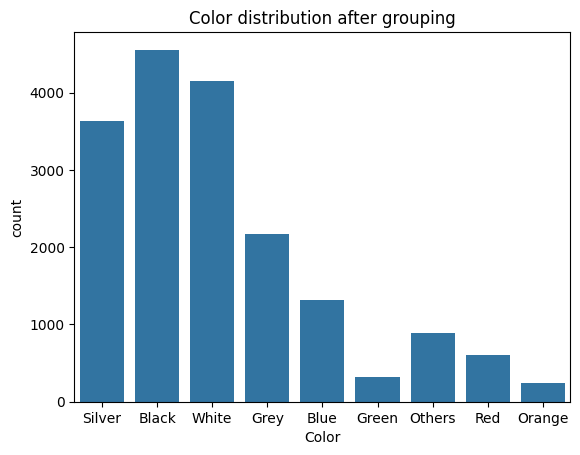

In [41]:
plt.title('Color distribution after grouping')
sns.countplot(x=new_df['Color'])
plt.show()

In [42]:
new_df

,index,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Color,Airbags,Turbo,Engine Volume
0,0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,186005,6.0,Automatic,4x4,Silver,12,No,3.5
1,1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,192000,6.0,Tiptronic,4x4,Black,8,No,3.0
2,2,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,200000,4.0,Variator,Front,Black,2,No,1.3
3,3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,168966,4.0,Automatic,4x4,White,0,No,2.5
4,4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,91901,4.0,Automatic,Front,Silver,4,No,1.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17864,18919,8467,0,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,300000,4.0,Manual,Rear,Silver,5,Yes,2.0
17865,18920,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,161600,4.0,Tiptronic,Front,Red,8,No,2.4
17866,18921,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,116365,4.0,Automatic,Front,Grey,4,No,2.0
17867,18922,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,51258,4.0,Automatic,Front,Black,4,No,2.0


In [43]:
result = new_df.groupby(['Drive wheels', 'Leather interior', 'Turbo'])['Price'].mean().unstack(fill_value=0).unstack(fill_value=0)
result

Turbo                       No                         Yes              
Leather interior            No           Yes            No           Yes
Drive wheels                                                            
4x4               14876.478049  11110.776366  16521.103704  25313.514523
Front             12155.139342  15188.221009  14190.953086  18937.648571
Rear               9283.865462  11395.843722  18049.627193  25760.616438

In [44]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# fig, axes = plt.subplots(1,2,figsize=(15, 5))
# axes[1].pie(x=vc.values, labels=vc.index, autopct='%.2f')
# sns.heatmap(result, annot=True, cmap="YlOrRd", fmt=".0f", ax=axes[0])
# axes[0].set_title("Mean Price by Drive Wheels, Leather Interior, and Turbo")
# plt.tight_layout()
# plt.show()

Observation -
1. The Drive wheels categories are not imbalanced each category has good distribution .
2. The prices are generally on the higher side when The car has Turbo and Leather interior, and on the lower side when any one or both or them are absent.

Conclusion -<br>
The Drive wheels features needs to be One hot encoded only, no other changes are required.

In [45]:
new_df.sample(5)

,index,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Color,Airbags,Turbo,Engine Volume
15583,16514,15681,1811,LEXUS,GX 460,2010,Jeep,Yes,Petrol,275240,8.0,Automatic,4x4,Silver,0,No,4.6
6305,6658,26657,919,MERCEDES-BENZ,ML 350,2012,Jeep,Yes,Diesel,271701,6.0,Automatic,4x4,White,12,No,3.0
12148,12872,23207,629,NISSAN,Juke,2015,Jeep,No,Petrol,33215,4.0,Automatic,4x4,Others,8,Yes,1.6
132,140,22580,1017,MERCEDES-BENZ,E 300,2017,Sedan,Yes,Petrol,50930,4.0,Automatic,Rear,Black,12,No,2.0
8954,9468,19444,0,TOYOTA,Camry,2010,Sedan,Yes,Petrol,85000,6.0,Automatic,Front,Grey,12,No,2.5


In [46]:
new_df['Gear box type'].describe()

count         17869
unique            4
top       Automatic
freq          12593
Name: Gear box type, dtype: object

In [47]:
new_df['Turbo_Leather'] = new_df['Turbo'] + ' Turbo, ' + new_df['Leather interior'] + ' Leather'

C:\Users\antho\AppData\Local\Temp\ipykernel_14156\3170478138.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Turbo_Leather'] = new_df['Turbo'] + ' Turbo, ' + new_df['Leather interior'] + ' Leather'


In [48]:
# fig, axes = plt.subplots(1, 2, figsize=(15,5))
# sns.boxplot(x='Gear box type', y='Price', hue='Turbo_Leather', data=new_df,ax=axes[0])
# gbt_vc = new_df['Gear box type'].value_counts()
# axes[1].pie(labels=gbt_vc.index, x=gbt_vc.values, autopct='%.2f')
# axes[0].legend(loc='upper right')
# plt.show() 

Observation - 
1. The data is imbalanced, majority distribution is occupied by 'Automatic' - Gear box type but all types share good amount of data.

Conclusion
There is no need of doing other changes than one hot encoding

In [49]:
new_df.drop(columns=['Turbo_Leather'], inplace=True)
new_df

C:\Users\antho\AppData\Local\Temp\ipykernel_14156\1622652803.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.drop(columns=['Turbo_Leather'], inplace=True)


,index,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Color,Airbags,Turbo,Engine Volume
0,0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,186005,6.0,Automatic,4x4,Silver,12,No,3.5
1,1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,192000,6.0,Tiptronic,4x4,Black,8,No,3.0
2,2,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,200000,4.0,Variator,Front,Black,2,No,1.3
3,3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,168966,4.0,Automatic,4x4,White,0,No,2.5
4,4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,91901,4.0,Automatic,Front,Silver,4,No,1.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17864,18919,8467,0,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,300000,4.0,Manual,Rear,Silver,5,Yes,2.0
17865,18920,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,161600,4.0,Tiptronic,Front,Red,8,No,2.4
17866,18921,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,116365,4.0,Automatic,Front,Grey,4,No,2.0
17867,18922,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,51258,4.0,Automatic,Front,Black,4,No,2.0


In [50]:
new_df['Category'].unique()

array(['Jeep', 'Hatchback', 'Sedan', 'Microbus', 'Goods wagon',
       'Universal', 'Coupe', 'Minivan', 'Cabriolet', 'Limousine',
       'Pickup'], dtype=object)

In [51]:
# cat_vc = new_df['Category'].value_counts()
# fig, axes = plt.subplots(1,2,figsize=(15,5))
# axes[0].set_title('Distribution of Car Category')
# axes[0].pie(x=cat_vc.values, labels=cat_vc.index, autopct='%.2f', startangle=190)
# sns.scatterplot(x=new_df['Category'], y=new_df['Price'], ax=axes[1])
# axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
# plt.show()

Observation :
There exists some categories of cars which have very less share in the distribution including Pickup,Cabriolet and Limousine.

Conclusion :
We will have to group the categories with less than 1% records as Others because the model will make poor predictions on this data.

In [52]:
vc =new_df['Category'].value_counts()
min_counts = len(new_df['Category'])/100 #1% of data length
cat_vc =  dict()
cat_vc_full = dict()

for i in range(len(vc)):
    if vc.values[i] < min_counts:
        cat_vc[vc.index[i]] = vc.values[i]
        cat_vc_full[vc.index[i]] = 0
    else:
        cat_vc[vc.index[i]] = 0
        cat_vc_full[vc.index[i]] = vc.values[i]

# plt.figure(figsize=(15,7))
# plt.bar(range(len(cat_vc_full)), list(cat_vc_full.values()), align='center')
# plt.bar(range(len(cat_vc)), list(cat_vc.values()), align='center')
# plt.xticks(range(len(cat_vc)), list(cat_vc.keys()),rotation=90)
# plt.legend(['Stays Original','Grouped as Others'])
# plt.title('Colour distribution')
# plt.show()

In [53]:
for key, val in cat_vc_full.items():
    if cat_vc_full[key] == 0:
        cat_vc_full[key] = 'Others'
    else:
        cat_vc_full[key] = key

new_df['Category'] = new_df['Category'].map(cat_vc_full)
new_df['Category'].unique()

C:\Users\antho\AppData\Local\Temp\ipykernel_14156\2301073742.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Category'] = new_df['Category'].map(cat_vc_full)


array(['Jeep', 'Hatchback', 'Sedan', 'Microbus', 'Goods wagon',
       'Universal', 'Coupe', 'Minivan', 'Others'], dtype=object)

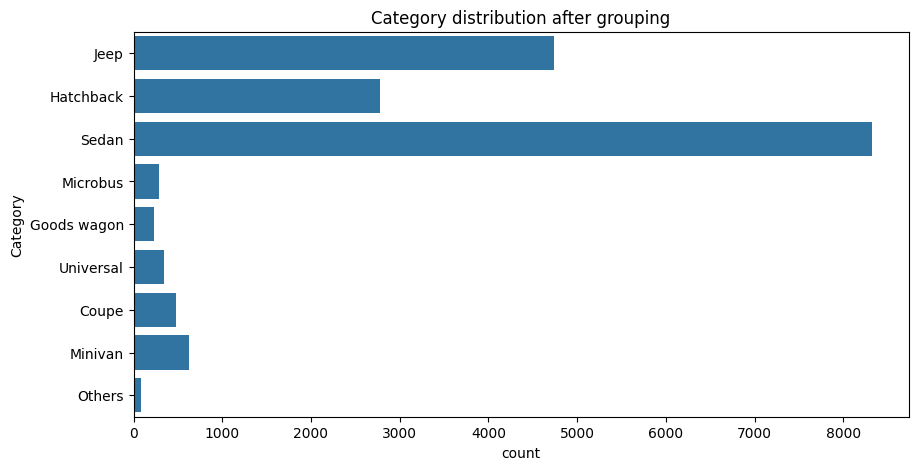

In [54]:
plt.figure(figsize=(10,5))
plt.title('Category distribution after grouping')
sns.countplot(y=new_df['Category'])
plt.show()

In [55]:
new_df.sample(5)

,index,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Color,Airbags,Turbo,Engine Volume
15209,16115,314,1172,MERCEDES-BENZ,E 350,2011,Sedan,Yes,Diesel,132630,6.0,Automatic,Rear,Silver,12,No,3.5
3535,3742,3450,607,TOYOTA,Camry,2019,Sedan,Yes,Hybrid,9626,4.0,Automatic,Front,Black,12,No,2.5
4707,4978,21953,690,HONDA,FIT,2016,Hatchback,No,Petrol,50400,4.0,Variator,Front,Others,12,No,1.5
3177,3364,9408,919,BMW,X5,2012,Jeep,Yes,Diesel,149520,6.0,Automatic,4x4,Grey,0,No,3.0
4026,4263,157,738,CHEVROLET,Cruze,2017,Sedan,Yes,Petrol,78837,4.0,Automatic,Front,Silver,12,No,1.4


In [56]:
new_df['Manufacturer'].unique()

array(['LEXUS', 'CHEVROLET', 'HONDA', 'FORD', 'HYUNDAI', 'TOYOTA',
       'MERCEDES-BENZ', 'OPEL', 'PORSCHE', 'BMW', 'JEEP', 'VOLKSWAGEN',
       'AUDI', 'RENAULT', 'NISSAN', 'SUBARU', 'DAEWOO', 'KIA',
       'MITSUBISHI', 'SSANGYONG', 'MAZDA', 'GMC', 'FIAT', 'INFINITI',
       'ALFA ROMEO', 'SUZUKI', 'ACURA', 'LINCOLN', 'VAZ', 'GAZ',
       'CITROEN', 'LAND ROVER', 'MINI', 'DODGE', 'CHRYSLER', 'ISUZU',
       'JAGUAR', 'SKODA', 'DAIHATSU', 'BUICK', 'CADILLAC', 'PEUGEOT',
       'VOLVO', 'სხვა', 'HAVAL', 'SCION', 'UAZ', 'MERCURY', 'ZAZ',
       'ROVER', 'SEAT', 'LANCIA', 'MOSKVICH', 'MASERATI', 'HUMMER',
       'SAAB', 'FERRARI', 'ROLLS-ROYCE', 'PONTIAC', 'SATURN', 'GREATWALL'],
      dtype=object)

სხვა means Other in Georgian used LLM to interpret this

In [57]:
def lowercase(row_val):
    return row_val.lower().strip()

In [58]:
new_df['Manufacturer'] = new_df['Manufacturer'].replace('სხვა','OTHER')
new_df['Manufacturer'] = new_df['Manufacturer'].apply(lowercase)
new_df['Manufacturer'].unique()

C:\Users\antho\AppData\Local\Temp\ipykernel_14156\2915718819.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Manufacturer'] = new_df['Manufacturer'].replace('სხვა','OTHER')
C:\Users\antho\AppData\Local\Temp\ipykernel_14156\2915718819.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Manufacturer'] = new_df['Manufacturer'].apply(lowercase)


array(['lexus', 'chevrolet', 'honda', 'ford', 'hyundai', 'toyota',
       'mercedes-benz', 'opel', 'porsche', 'bmw', 'jeep', 'volkswagen',
       'audi', 'renault', 'nissan', 'subaru', 'daewoo', 'kia',
       'mitsubishi', 'ssangyong', 'mazda', 'gmc', 'fiat', 'infiniti',
       'alfa romeo', 'suzuki', 'acura', 'lincoln', 'vaz', 'gaz',
       'citroen', 'land rover', 'mini', 'dodge', 'chrysler', 'isuzu',
       'jaguar', 'skoda', 'daihatsu', 'buick', 'cadillac', 'peugeot',
       'volvo', 'other', 'haval', 'scion', 'uaz', 'mercury', 'zaz',
       'rover', 'seat', 'lancia', 'moskvich', 'maserati', 'hummer',
       'saab', 'ferrari', 'rolls-royce', 'pontiac', 'saturn', 'greatwall'],
      dtype=object)

In [59]:
print('Total Unique Manufacturers : ', len(new_df['Manufacturer'].unique()))

Total Unique Manufacturers :  61


In [60]:
print('(Before Cleaning) Total Unique Models : ', len(new_df['Model'].unique()))

(Before Cleaning) Total Unique Models :  1498


In [61]:
for model in list(new_df['Manufacturer'].unique()):
    print(list(new_df[new_df['Manufacturer'] == model]['Model'].unique()))

['RX 450', 'RX 350', 'RX 400', 'GX 470', 'GX 460', 'CT 200h', 'RX 300', 'RX 400 HYBRID', 'NX 200', 'HS 250h Hybrid', 'ES 350', 'ES 300', 'IS 250', 'LS 460', 'IS 350', 'HS 250h', 'CT 200h F-sport', 'LX 570', 'GS 350', 'LX 470', 'RX 450 H', 'CT 200h F SPORT', 'RC F', 'IS 250 რესტაილინგი', 'IS 200', 'RX 400 RESTAILING', 'GX 470 470', 'IS 300', 'GS 300', 'IS 250 TURBO', 'NX 300', 'IS-F', 'RX 450 HYBRID', 'ES 300 hybrid', 'IS 350 C', 'CT 200h 1.8', 'GS 450', 'RX 400 hybrid', 'CT 200h F sport', 'RX 400 H']
['Equinox', 'Cruze LT', 'Captiva', 'Cruze', 'Orlando', 'Volt', 'Avalanche', 'Malibu', 'Lacetti', 'Aveo', 'Matiz', 'Spark', 'Impala', 'Cruze ltz', 'Cruze LTZ', 'Camaro', 'Cruze strocna', 'Volt premier', 'Traverse', 'Cruze Premier', '1500', 'Equinox LT', 'Cruze RS', 'Sonic', 'Cruze LS', 'Trailblazer', 'Cruze sonic', 'Nubira', 'Cruze L T', 'Malibu LT', 'Malibu eco', 'HHR', 'Suburban', 'Cruze Cruze', 'Camaro LS', 'Silverado', 'Malibu Hybrid', 'Trax', 'Volt Full Packet', 'Volt PREMIER', 'Sonic 

Observation : 
1. Here we can see multiple presence of the same model in different cases which is making the model two different models .
2. Also we can see that the base model variants are containing the precise model name along with its fuel type, turbo availability, engine vol, etc. 

Conclusion :
1. To eliminate same model name occurance in different cases we will lowercase and strip all the model names so case sensitivity is not an issue.
2. We will have to take a deep look into the model names for each manufacturer to capture the format model names . 

In [62]:
new_df['Model'] = new_df['Model'].apply(lowercase)

C:\Users\antho\AppData\Local\Temp\ipykernel_14156\1519965629.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Model'] = new_df['Model'].apply(lowercase)


In [63]:
test = new_df.copy()

In [64]:
for id, manufacturer in enumerate(list(new_df['Manufacturer'].unique())):
    models = list(new_df[new_df['Manufacturer'] == manufacturer]['Model'].unique())
    base_models = list()
    # manual model names pattern extraction
    if manufacturer == 'lexus':
        for model in models:
            base_models.append(model[:6])
    elif manufacturer == 'mercedes-benz':
        for model in models:
            l1 = list()
            for char in model:
                if char.isdigit():
                    l1.append(char)
                    if len(l1) == 3:
                        break
            splitter = str()
            for element in l1 :
                splitter= splitter + str(element)

            if len(l1) == 3 :
                bm = model.split(splitter)[0] + splitter
            else : 
                bm = model.split(' ')[0]
            base_models.append(bm)
    elif manufacturer == 'fiat':
        for model in models :
            if '500' in model:
                bm = '500'
            else :
                bm = model.split(' ')[0]
            base_models.append(bm)
    else :
        for model in models:
            base_models.append(model.split(' ')[0])

    print('Manufacturer : ', manufacturer, '\n Models - ', models,
          '\n Base models - ', base_models)

    models_map = dict()
    for i,j in zip(models, base_models):
        models_map[i] = j

    # For verification    
    # user = input('Verify : y(approve and continue) n(break)')
    # if user == 'y':
    #     pass
    # else :
    #     break

    new_df['Model'] = new_df['Model'].replace(models_map)


Manufacturer :  lexus 
 Models -  ['rx 450', 'rx 350', 'rx 400', 'gx 470', 'gx 460', 'ct 200h', 'rx 300', 'rx 400 hybrid', 'nx 200', 'hs 250h hybrid', 'es 350', 'es 300', 'is 250', 'ls 460', 'is 350', 'hs 250h', 'ct 200h f-sport', 'lx 570', 'gs 350', 'lx 470', 'rx 450 h', 'ct 200h f sport', 'rc f', 'is 250 რესტაილინგი', 'is 200', 'rx 400 restailing', 'gx 470 470', 'is 300', 'gs 300', 'is 250 turbo', 'nx 300', 'is-f', 'rx 450 hybrid', 'es 300 hybrid', 'is 350 c', 'ct 200h 1.8', 'gs 450', 'rx 400 h'] 
 Base models -  ['rx 450', 'rx 350', 'rx 400', 'gx 470', 'gx 460', 'ct 200', 'rx 300', 'rx 400', 'nx 200', 'hs 250', 'es 350', 'es 300', 'is 250', 'ls 460', 'is 350', 'hs 250', 'ct 200', 'lx 570', 'gs 350', 'lx 470', 'rx 450', 'ct 200', 'rc f', 'is 250', 'is 200', 'rx 400', 'gx 470', 'is 300', 'gs 300', 'is 250', 'nx 300', 'is-f', 'rx 450', 'es 300', 'is 350', 'ct 200', 'gs 450', 'rx 400']


C:\Users\antho\AppData\Local\Temp\ipykernel_14156\957755539.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Model'] = new_df['Model'].replace(models_map)


Manufacturer :  chevrolet 
 Models -  ['equinox', 'cruze lt', 'captiva', 'cruze', 'orlando', 'volt', 'avalanche', 'malibu', 'lacetti', 'aveo', 'matiz', 'spark', 'impala', 'cruze ltz', 'camaro', 'cruze strocna', 'volt premier', 'traverse', 'cruze premier', '1500', 'equinox lt', 'cruze rs', 'sonic', 'cruze ls', 'trailblazer', 'cruze sonic', 'nubira', 'cruze l t', 'malibu lt', 'malibu eco', 'hhr', 'suburban', 'cruze cruze', 'camaro ls', 'silverado', 'malibu hybrid', 'trax', 'volt full packet', 'sonic lt', 'corvette', 'niva', 'camaro rs', 'cruze lt rs', 'kalos', 'cruze s'] 
 Base models -  ['equinox', 'cruze', 'captiva', 'cruze', 'orlando', 'volt', 'avalanche', 'malibu', 'lacetti', 'aveo', 'matiz', 'spark', 'impala', 'cruze', 'camaro', 'cruze', 'volt', 'traverse', 'cruze', '1500', 'equinox', 'cruze', 'sonic', 'cruze', 'trailblazer', 'cruze', 'nubira', 'cruze', 'malibu', 'malibu', 'hhr', 'suburban', 'cruze', 'camaro', 'silverado', 'malibu', 'trax', 'volt', 'sonic', 'corvette', 'niva', 'cama

In [65]:
print('Total unique models : ', len(new_df['Model'].unique()))

Total unique models :  714


We can see here we have significantly reduced the number of unique models which will prove beneficial as the prices of the variant model wont have much difference and each variant model wont have many records to be able to strengthen the prediction accuracy of the model. 
Also the names of the model wont be a differenciator among prices the other features would be for example a limited edition model might have a higher engine volume so the model know the car's price is high because it has a higher engine volume and not because of the name of the model .

In [66]:
new_df

,index,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Color,Airbags,Turbo,Engine Volume
0,0,13328,1399,lexus,rx 450,2010,Jeep,Yes,Hybrid,186005,6.0,Automatic,4x4,Silver,12,No,3.5
1,1,16621,1018,chevrolet,equinox,2011,Jeep,No,Petrol,192000,6.0,Tiptronic,4x4,Black,8,No,3.0
2,2,8467,0,honda,fit,2006,Hatchback,No,Petrol,200000,4.0,Variator,Front,Black,2,No,1.3
3,3,3607,862,ford,escape,2011,Jeep,Yes,Hybrid,168966,4.0,Automatic,4x4,White,0,No,2.5
4,4,11726,446,honda,fit,2014,Hatchback,Yes,Petrol,91901,4.0,Automatic,Front,Silver,4,No,1.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17864,18919,8467,0,mercedes-benz,clk 200,1999,Coupe,Yes,CNG,300000,4.0,Manual,Rear,Silver,5,Yes,2.0
17865,18920,15681,831,hyundai,sonata,2011,Sedan,Yes,Petrol,161600,4.0,Tiptronic,Front,Red,8,No,2.4
17866,18921,26108,836,hyundai,tucson,2010,Jeep,Yes,Diesel,116365,4.0,Automatic,Front,Grey,4,No,2.0
17867,18922,5331,1288,chevrolet,captiva,2007,Jeep,Yes,Diesel,51258,4.0,Automatic,Front,Black,4,No,2.0


In [67]:
vc =new_df['Manufacturer'].value_counts()
min_counts = len(new_df['Manufacturer'])/20 #1% of data length
man_vc =  dict()
man_vc_full = dict()

for i in range(len(vc)):
    if vc.values[i] < min_counts:
        man_vc[vc.index[i]] = vc.values[i]
        man_vc_full[vc.index[i]] = 0
    else:
        man_vc[vc.index[i]] = 0
        man_vc_full[vc.index[i]] = vc.values[i]

# plt.figure(figsize=(15,7))
# plt.bar(range(len(man_vc_full)), list(man_vc_full.values()), align='center')
# plt.bar(range(len(man_vc)), list(man_vc.values()), align='center')
# plt.xticks(range(len(man_vc)), list(man_vc.keys()),rotation=90)
# plt.legend(['Stays Original','Grouped as Others'])
# plt.title('Manufacturer distribution')
# plt.show()

In [68]:
man_vc = new_df['Manufacturer'].value_counts()
limit = len(new_df)//20 # 1% length of data
others = list()
sum = 0
for i, j in zip(man_vc.values, man_vc.index):
    if i <= limit:
        print(i,j)
        others.append(j)
        sum = sum + i
print(sum)

799 lexus
645 nissan
570 volkswagen
417 ssangyong
413 kia
394 opel
283 mitsubishi
274 subaru
243 audi
171 mazda
123 jeep
91 daewoo
90 dodge
76 fiat
74 suzuki
47 vaz
46 mini
36 renault
32 jaguar
31 porsche
26 infiniti
26 land rover
26 chrysler
20 skoda
19 volvo
16 buick
16 peugeot
15 acura
15 gmc
15 lincoln
14 cadillac
13 daihatsu
12 uaz
11 gaz
9 citroen
7 scion
4 isuzu
4 alfa romeo
4 mercury
4 moskvich
4 maserati
4 hummer
3 rover
2 rolls-royce
2 zaz
2 seat
2 other
2 saab
1 saturn
1 pontiac
1 lancia
1 ferrari
1 haval
1 greatwall
5158


 if there are less records for this manufacturer then by default their respective models will also be less, such that the model will not be able to predict the prices accurately. So we will have to group them as others in Manufacturer as well as Model feature.

 Also this will generalize the model predictions and not overfit according to the data.

In [69]:
def group_man(value):
    if value in others:
        return 'other'
    else :
        return value

In [70]:
new_df['Manufacturer'] =  new_df['Manufacturer'].apply(group_man)
print('Total uniques after grouping : ', new_df['Manufacturer'].unique())
new_df[new_df['Manufacturer'] == 'other']

Total uniques after grouping :  ['other' 'chevrolet' 'honda' 'ford' 'hyundai' 'toyota' 'mercedes-benz'
 'bmw']


C:\Users\antho\AppData\Local\Temp\ipykernel_14156\1586487212.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Manufacturer'] =  new_df['Manufacturer'].apply(group_man)


,index,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Color,Airbags,Turbo,Engine Volume
0,0,13328,1399,other,rx 450,2010,Jeep,Yes,Hybrid,186005,6.0,Automatic,4x4,Silver,12,No,3.5
9,9,26657,0,other,rx 350,2007,Jeep,Yes,Petrol,128500,6.0,Automatic,4x4,Silver,12,No,3.5
12,12,3000,0,other,vectra,1997,Goods wagon,No,CNG,350000,4.0,Manual,Front,White,4,No,1.6
13,13,1019,1055,other,rx 450,2013,Jeep,Yes,Hybrid,138038,6.0,Automatic,Front,White,12,No,3.5
18,19,941,1850,other,rx 400,2008,Jeep,Yes,Hybrid,364523,6.0,Automatic,4x4,Black,12,No,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17853,18908,15681,0,other,jetta,2013,Sedan,Yes,Petrol,81200,5.0,Manual,Front,Silver,12,No,2.5
17855,18910,8781,0,other,caliber,2008,Hatchback,No,Petrol,0,4.0,Automatic,Front,Blue,4,No,2.4
17856,18911,19130,0,other,optima,2014,Sedan,Yes,Petrol,35800,4.0,Automatic,Front,Black,12,No,2.4
17857,18912,8781,1107,other,combo,2007,Goods wagon,No,Diesel,236000,4.0,Manual,Front,Others,4,Yes,1.7


In [71]:
# plt.figure(figsize=(15,5))
# sns.countplot(x=new_df['Manufacturer'])
# plt.xticks(rotation=90)
# plt.show()

In [72]:
new_df['Model'] = np.where(new_df['Manufacturer'] == 'other', 'other', new_df['Model'])
new_df[new_df['Model']=='other']

C:\Users\antho\AppData\Local\Temp\ipykernel_14156\131831961.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Model'] = np.where(new_df['Manufacturer'] == 'other', 'other', new_df['Model'])


,index,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Color,Airbags,Turbo,Engine Volume
0,0,13328,1399,other,other,2010,Jeep,Yes,Hybrid,186005,6.0,Automatic,4x4,Silver,12,No,3.5
9,9,26657,0,other,other,2007,Jeep,Yes,Petrol,128500,6.0,Automatic,4x4,Silver,12,No,3.5
12,12,3000,0,other,other,1997,Goods wagon,No,CNG,350000,4.0,Manual,Front,White,4,No,1.6
13,13,1019,1055,other,other,2013,Jeep,Yes,Hybrid,138038,6.0,Automatic,Front,White,12,No,3.5
18,19,941,1850,other,other,2008,Jeep,Yes,Hybrid,364523,6.0,Automatic,4x4,Black,12,No,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17853,18908,15681,0,other,other,2013,Sedan,Yes,Petrol,81200,5.0,Manual,Front,Silver,12,No,2.5
17855,18910,8781,0,other,other,2008,Hatchback,No,Petrol,0,4.0,Automatic,Front,Blue,4,No,2.4
17856,18911,19130,0,other,other,2014,Sedan,Yes,Petrol,35800,4.0,Automatic,Front,Black,12,No,2.4
17857,18912,8781,1107,other,other,2007,Goods wagon,No,Diesel,236000,4.0,Manual,Front,Others,4,Yes,1.7


In [73]:
new_df['Model'].value_counts()

Model
other       5158
prius       1240
sonata      1033
camry        978
elantra      947
            ... 
3.25e+48       1
300            1
116            1
735            1
cl 600         1
Name: count, Length: 329, dtype: int64

In [74]:
# plt.figure(figsize=(15,5))
# sns.countplot(x=new_df['Model'])
# plt.xticks(rotation=90)
# plt.show()

we will need to do the same thing for model feature i.e. grouping

In [75]:
vc =new_df['Model'].value_counts()
min_counts = len(new_df['Model'])/100 #1% of data length
mod_vc =  dict()
mod_vc_full = dict()

for i in range(len(vc)):
    if vc.values[i] < min_counts:
        mod_vc[vc.index[i]] = vc.values[i]
        mod_vc_full[vc.index[i]] = 0
    else:
        mod_vc[vc.index[i]] = 0
        mod_vc_full[vc.index[i]] = vc.values[i]

# plt.figure(figsize=(15,7))
# plt.bar(range(len(mod_vc_full)), list(mod_vc_full.values()), align='center')
# plt.bar(range(len(mod_vc)), list(mod_vc.values()), align='center')
# plt.xticks(range(len(mod_vc)), list(mod_vc.keys()),rotation=90)
# plt.legend(['Stays Original','Grouped as Others'])
# plt.title('Model distribution')
# plt.show()

In [76]:
for key, val in mod_vc_full.items():
    if mod_vc_full[key] == 0:
        mod_vc_full[key] = 'other'
    else:
        mod_vc_full[key] = key

new_df['Model'] = new_df['Model'].map(mod_vc_full)
new_df['Model'].unique()

C:\Users\antho\AppData\Local\Temp\ipykernel_14156\505124087.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Model'] = new_df['Model'].map(mod_vc_full)


array(['other', 'fit', 'santa', 'prius', 'sonata', 'camry', 'e 350',
       'transit', 'elantra', 'highlander', 'x5', 'h1', 'aqua', 'cruze',
       'fusion', 'tucson', 'ml 350'], dtype=object)

In [77]:
# plt.figure(figsize=(15,5))
# sns.countplot(x=new_df['Model'])
# plt.xticks(rotation=90)
# plt.show()

we can visualize that model name feature is highly imbalanced its better to drop this feature as it can affect the models prediction.

In [78]:
new_df.drop(columns=['Model'], inplace=True)
new_df

C:\Users\antho\AppData\Local\Temp\ipykernel_14156\1424678293.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.drop(columns=['Model'], inplace=True)


,index,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Color,Airbags,Turbo,Engine Volume
0,0,13328,1399,other,2010,Jeep,Yes,Hybrid,186005,6.0,Automatic,4x4,Silver,12,No,3.5
1,1,16621,1018,chevrolet,2011,Jeep,No,Petrol,192000,6.0,Tiptronic,4x4,Black,8,No,3.0
2,2,8467,0,honda,2006,Hatchback,No,Petrol,200000,4.0,Variator,Front,Black,2,No,1.3
3,3,3607,862,ford,2011,Jeep,Yes,Hybrid,168966,4.0,Automatic,4x4,White,0,No,2.5
4,4,11726,446,honda,2014,Hatchback,Yes,Petrol,91901,4.0,Automatic,Front,Silver,4,No,1.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17864,18919,8467,0,mercedes-benz,1999,Coupe,Yes,CNG,300000,4.0,Manual,Rear,Silver,5,Yes,2.0
17865,18920,15681,831,hyundai,2011,Sedan,Yes,Petrol,161600,4.0,Tiptronic,Front,Red,8,No,2.4
17866,18921,26108,836,hyundai,2010,Jeep,Yes,Diesel,116365,4.0,Automatic,Front,Grey,4,No,2.0
17867,18922,5331,1288,chevrolet,2007,Jeep,Yes,Diesel,51258,4.0,Automatic,Front,Black,4,No,2.0


As the vehical can have any production year that our data might not have so we will but the production years in buckets of each decade

In [79]:
a = list(new_df['Prod. year'])
print(a)
a.sort()
print('most old : ', a[0], ' most recent : ',a[-1])

[2010, 2011, 2006, 2011, 2014, 2016, 2010, 2013, 2014, 2007, 2014, 1999, 1997, 2013, 2018, 2016, 2016, 2006, 2008, 2012, 2012, 2017, 2001, 1995, 2006, 2008, 2008, 2011, 2009, 2007, 2014, 2000, 2008, 2007, 2011, 2010, 2012, 2010, 2013, 2016, 2016, 2014, 2010, 2013, 2012, 2012, 2008, 2016, 2015, 2008, 2017, 2014, 2001, 2015, 2012, 2018, 2013, 2007, 2013, 2004, 2013, 2015, 2014, 2016, 2013, 2001, 2015, 2011, 2017, 2011, 2016, 2014, 2012, 2008, 2009, 2010, 2019, 2014, 1998, 2012, 2012, 2014, 2012, 2010, 2012, 1995, 2012, 2008, 2016, 2013, 1990, 1997, 2004, 2009, 2014, 2013, 2015, 2010, 2004, 2007, 2015, 2013, 2013, 2016, 2008, 2016, 2010, 2005, 2003, 1997, 2003, 2013, 2010, 2013, 1995, 2014, 2009, 2015, 2012, 2014, 2014, 1999, 2008, 2012, 2004, 2008, 2011, 2012, 1997, 2010, 2015, 2013, 2017, 2014, 2014, 2013, 1985, 2018, 2015, 2011, 2014, 2005, 2013, 2016, 2010, 2014, 2012, 2016, 2012, 2016, 2008, 2013, 2014, 2018, 2009, 2011, 1997, 2015, 2012, 2017, 1998, 2019, 2018, 2016, 2014, 2011, 200

production year buckets - <br>
1940-1950 : 0<br>
1951-1960 : 1<br>
1961-1970 : 2<br>
1971-1980 : 3<br>
1981-1990 : 4<br>
1991-2000 : 5<br>
2001-2010 : 6<br>
2011-2020 : 7

In [80]:
def bucket_years(val):
    if val in range(1900,1950):
        return 0
    elif val in range(1951,1960):
        return 1
    elif val in range(1961,1970):
        return 2
    elif val in range(1971,1980):
        return 3
    elif val in range(1981,1990):
        return 4
    elif val in range(1991,2000):
        return 5
    elif val in range(2001,2010):
        return 6
    else : 
        return 7

In [81]:
new_df['Prod. year'] = new_df['Prod. year'].apply(bucket_years)
new_df

C:\Users\antho\AppData\Local\Temp\ipykernel_14156\558142707.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Prod. year'] = new_df['Prod. year'].apply(bucket_years)


,index,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Color,Airbags,Turbo,Engine Volume
0,0,13328,1399,other,7,Jeep,Yes,Hybrid,186005,6.0,Automatic,4x4,Silver,12,No,3.5
1,1,16621,1018,chevrolet,7,Jeep,No,Petrol,192000,6.0,Tiptronic,4x4,Black,8,No,3.0
2,2,8467,0,honda,6,Hatchback,No,Petrol,200000,4.0,Variator,Front,Black,2,No,1.3
3,3,3607,862,ford,7,Jeep,Yes,Hybrid,168966,4.0,Automatic,4x4,White,0,No,2.5
4,4,11726,446,honda,7,Hatchback,Yes,Petrol,91901,4.0,Automatic,Front,Silver,4,No,1.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17864,18919,8467,0,mercedes-benz,5,Coupe,Yes,CNG,300000,4.0,Manual,Rear,Silver,5,Yes,2.0
17865,18920,15681,831,hyundai,7,Sedan,Yes,Petrol,161600,4.0,Tiptronic,Front,Red,8,No,2.4
17866,18921,26108,836,hyundai,7,Jeep,Yes,Diesel,116365,4.0,Automatic,Front,Grey,4,No,2.0
17867,18922,5331,1288,chevrolet,6,Jeep,Yes,Diesel,51258,4.0,Automatic,Front,Black,4,No,2.0


In [82]:
for col in new_df.columns:
    print(len(new_df[col].unique()))

17869
1855
533
8
8
9
2
6
7218
13
4
3
9
17
2
103


### Converting Categorical to Numerical
#### Label encoding

In [83]:
new_df['Leather interior'] = new_df['Leather interior'].map({'Yes':1.0,'No':0.0})
new_df['Turbo'] = new_df['Turbo'].map({'Yes':1.0,'No':0.0})

C:\Users\antho\AppData\Local\Temp\ipykernel_14156\3836010743.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Leather interior'] = new_df['Leather interior'].map({'Yes':1.0,'No':0.0})
C:\Users\antho\AppData\Local\Temp\ipykernel_14156\3836010743.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Turbo'] = new_df['Turbo'].map({'Yes':1.0,'No':0.0})


In [84]:
new_df

,index,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Color,Airbags,Turbo,Engine Volume
0,0,13328,1399,other,7,Jeep,1.0,Hybrid,186005,6.0,Automatic,4x4,Silver,12,0.0,3.5
1,1,16621,1018,chevrolet,7,Jeep,0.0,Petrol,192000,6.0,Tiptronic,4x4,Black,8,0.0,3.0
2,2,8467,0,honda,6,Hatchback,0.0,Petrol,200000,4.0,Variator,Front,Black,2,0.0,1.3
3,3,3607,862,ford,7,Jeep,1.0,Hybrid,168966,4.0,Automatic,4x4,White,0,0.0,2.5
4,4,11726,446,honda,7,Hatchback,1.0,Petrol,91901,4.0,Automatic,Front,Silver,4,0.0,1.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17864,18919,8467,0,mercedes-benz,5,Coupe,1.0,CNG,300000,4.0,Manual,Rear,Silver,5,1.0,2.0
17865,18920,15681,831,hyundai,7,Sedan,1.0,Petrol,161600,4.0,Tiptronic,Front,Red,8,0.0,2.4
17866,18921,26108,836,hyundai,7,Jeep,1.0,Diesel,116365,4.0,Automatic,Front,Grey,4,0.0,2.0
17867,18922,5331,1288,chevrolet,6,Jeep,1.0,Diesel,51258,4.0,Automatic,Front,Black,4,0.0,2.0


#### One hot encoding

In [85]:
new_df = pd.get_dummies(data=new_df, columns=['Manufacturer','Category', 'Fuel type','Gear box type','Drive wheels','Color'], dtype=float, drop_first=True)
new_df

,index,Price,Levy,Prod. year,Leather interior,Mileage,Cylinders,Airbags,Turbo,Engine Volume,...,Drive wheels_Front,Drive wheels_Rear,Color_Blue,Color_Green,Color_Grey,Color_Orange,Color_Others,Color_Red,Color_Silver,Color_White
0,0,13328,1399,7,1.0,186005,6.0,12,0.0,3.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,16621,1018,7,0.0,192000,6.0,8,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,8467,0,6,0.0,200000,4.0,2,0.0,1.3,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,3607,862,7,1.0,168966,4.0,0,0.0,2.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4,11726,446,7,1.0,91901,4.0,4,0.0,1.3,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17864,18919,8467,0,5,1.0,300000,4.0,5,1.0,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
17865,18920,15681,831,7,1.0,161600,4.0,8,0.0,2.4,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
17866,18921,26108,836,7,1.0,116365,4.0,4,0.0,2.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
17867,18922,5331,1288,6,1.0,51258,4.0,4,0.0,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [86]:
new_df['Engine Volume'] = new_df['Engine Volume'].astype(float)

In [87]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17869 entries, 0 to 17868
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       17869 non-null  int64  
 1   Price                       17869 non-null  int64  
 2   Levy                        17869 non-null  int32  
 3   Prod. year                  17869 non-null  int64  
 4   Leather interior            17869 non-null  float64
 5   Mileage                     17869 non-null  int64  
 6   Cylinders                   17869 non-null  float64
 7   Airbags                     17869 non-null  int64  
 8   Turbo                       17869 non-null  float64
 9   Engine Volume               17869 non-null  float64
 10  Manufacturer_chevrolet      17869 non-null  float64
 11  Manufacturer_ford           17869 non-null  float64
 12  Manufacturer_honda          17869 non-null  float64
 13  Manufacturer_hyundai        178

In [88]:
scaling_cols = list()
for col in new_df.columns:
    if col != 'Price' :
        max_val = max(list(new_df[col]))
        if max_val > 1.0:
            scaling_cols.append(col)
            print(' Feature : ', col,'\t Max value :  ',max_val)

 Feature :  index 	 Max value :   18923
 Feature :  Levy 	 Max value :   11714
 Feature :  Prod. year 	 Max value :   7
 Feature :  Mileage 	 Max value :   2147483647
 Feature :  Cylinders 	 Max value :   16.0
 Feature :  Airbags 	 Max value :   16
 Feature :  Engine Volume 	 Max value :   20.0


as we dont have the mileage units (km/miles/meters) we cannot do any processing on it

In [89]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler

StandardScaler()

In [90]:
scaled_df = pd.DataFrame(scaler.fit_transform(new_df[scaling_cols]), columns=scaling_cols)
scaled_df

,index,Levy,Prod. year,Mileage,Cylinders,Airbags,Engine Volume
0,-1.730053,1.375091,0.536128,-0.029000,1.256101,1.255022,1.427610
1,-1.729870,0.701273,0.536128,-0.028881,1.256101,0.330220,0.844069
2,-1.729687,-1.099111,-1.144585,-0.028722,-0.470989,-1.056983,-1.139970
3,-1.729504,0.425379,0.536128,-0.029340,-0.470989,-1.519384,0.260528
4,-1.729321,-0.310338,0.536128,-0.030874,-0.470989,-0.594582,-1.139970
...,...,...,...,...,...,...,...
17864,1.729730,-1.099111,-2.825298,-0.026730,-0.470989,-0.363382,-0.323013
17865,1.729913,0.370554,0.536128,-0.029486,-0.470989,0.330220,0.143820
17866,1.730096,0.379397,0.536128,-0.030387,-0.470989,-0.594582,-0.323013
17867,1.730279,1.178782,-1.144585,-0.031684,-0.470989,-0.594582,-0.323013


In [91]:
new_df.drop(columns=scaling_cols, inplace=True)
new_df

,Price,Leather interior,Turbo,Manufacturer_chevrolet,Manufacturer_ford,Manufacturer_honda,Manufacturer_hyundai,Manufacturer_mercedes-benz,Manufacturer_other,Manufacturer_toyota,...,Drive wheels_Front,Drive wheels_Rear,Color_Blue,Color_Green,Color_Grey,Color_Orange,Color_Others,Color_Red,Color_Silver,Color_White
0,13328,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,16621,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8467,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3607,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,11726,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17864,8467,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
17865,15681,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
17866,26108,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
17867,5331,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
cols = new_df.columns.tolist()
cols.extend(scaled_df.columns)
cols

['Price',
 'Leather interior',
 'Turbo',
 'Manufacturer_chevrolet',
 'Manufacturer_ford',
 'Manufacturer_honda',
 'Manufacturer_hyundai',
 'Manufacturer_mercedes-benz',
 'Manufacturer_other',
 'Manufacturer_toyota',
 'Category_Goods wagon',
 'Category_Hatchback',
 'Category_Jeep',
 'Category_Microbus',
 'Category_Minivan',
 'Category_Others',
 'Category_Sedan',
 'Category_Universal',
 'Fuel type_Diesel',
 'Fuel type_Hybrid',
 'Fuel type_LPG',
 'Fuel type_Other',
 'Fuel type_Petrol',
 'Gear box type_Manual',
 'Gear box type_Tiptronic',
 'Gear box type_Variator',
 'Drive wheels_Front',
 'Drive wheels_Rear',
 'Color_Blue',
 'Color_Green',
 'Color_Grey',
 'Color_Orange',
 'Color_Others',
 'Color_Red',
 'Color_Silver',
 'Color_White',
 'index',
 'Levy',
 'Prod. year',
 'Mileage',
 'Cylinders',
 'Airbags',
 'Engine Volume']

In [93]:
import pandas as pd

result = pd.concat([new_df, scaled_df], axis=1, ignore_index=True)
result.columns = cols
result

,Price,Leather interior,Turbo,Manufacturer_chevrolet,Manufacturer_ford,Manufacturer_honda,Manufacturer_hyundai,Manufacturer_mercedes-benz,Manufacturer_other,Manufacturer_toyota,...,Color_Red,Color_Silver,Color_White,index,Levy,Prod. year,Mileage,Cylinders,Airbags,Engine Volume
0,13328,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,-1.730053,1.375091,0.536128,-0.029000,1.256101,1.255022,1.427610
1,16621,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-1.729870,0.701273,0.536128,-0.028881,1.256101,0.330220,0.844069
2,8467,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-1.729687,-1.099111,-1.144585,-0.028722,-0.470989,-1.056983,-1.139970
3,3607,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,-1.729504,0.425379,0.536128,-0.029340,-0.470989,-1.519384,0.260528
4,11726,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,-1.729321,-0.310338,0.536128,-0.030874,-0.470989,-0.594582,-1.139970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17864,8467,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.729730,-1.099111,-2.825298,-0.026730,-0.470989,-0.363382,-0.323013
17865,15681,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.729913,0.370554,0.536128,-0.029486,-0.470989,0.330220,0.143820
17866,26108,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.730096,0.379397,0.536128,-0.030387,-0.470989,-0.594582,-0.323013
17867,5331,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.730279,1.178782,-1.144585,-0.031684,-0.470989,-0.594582,-0.323013


<Axes: >

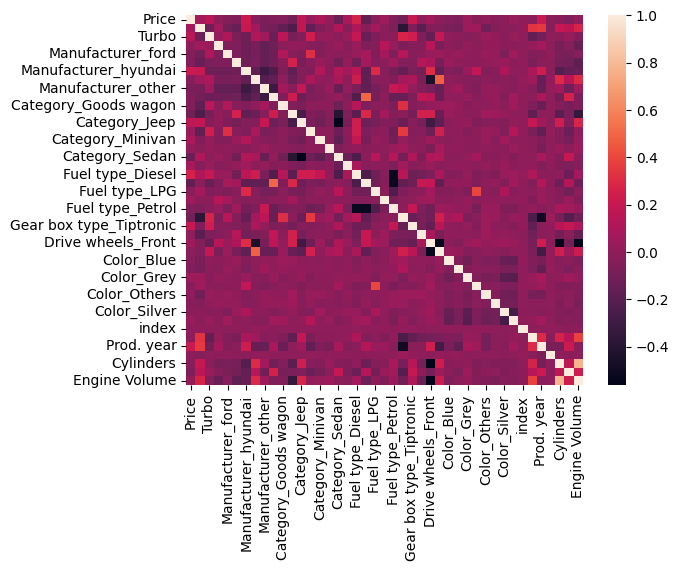

In [94]:
sns.heatmap(result.corr())

In [95]:
X = result.drop(columns=['Price'])
y = result['Price']

print(X.shape, y.shape)

(17869, 42) (17869,)


In [96]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X, y,random_state=42, test_size=0.2)

In [97]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor

dtree = DecisionTreeRegressor(max_depth=10, ccp_alpha=0.3, max_leaf_nodes=75)
rforest = RandomForestRegressor()
gb = GradientBoostingRegressor()
ada_b = AdaBoostRegressor()
xgb = XGBRegressor()

In [98]:
dtree.fit(x_train,y_train)
rforest.fit(x_train,y_train)
xgb.fit(x_train,y_train)
gb.fit(x_train,y_train)
ada_b.fit(x_train,y_train)

AdaBoostRegressor()

In [99]:
xgb_preds = xgb.predict(x_test)
gb_preds = gb.predict(x_test)
ada_b_preds = ada_b.predict(x_test)
tree_preds = dtree.predict(x_test)
rforest_preds = rforest.predict(x_test)

In [100]:
prediction_df = pd.DataFrame()
prediction_df['Acutal'] = y_test
prediction_df['XGB Preds'] = xgb_preds
prediction_df['Dtree Preds'] = tree_preds
prediction_df['RForest Preds'] = rforest_preds
prediction_df['GB Preds'] = gb_preds
prediction_df['Ada_b Preds'] = ada_b_preds
prediction_df

,Acutal,XGB Preds,Dtree Preds,RForest Preds,GB Preds,Ada_b Preds
4866,3763,3828.407715,7467.765343,9094.75,8964.715496,19269.277904
2726,941,4370.775391,8833.475225,3971.29,11933.287078,22310.601537
8863,4704,2607.556152,7642.109409,5225.93,6299.338242,15656.784471
9622,23521,19119.884766,4187.426039,22557.41,10806.819434,19770.724510
16267,15718,20186.978516,13049.617647,22630.60,19917.042969,23871.844042
...,...,...,...,...,...,...
8908,33556,26915.210938,21619.250000,26684.60,17321.104986,21980.579288
7874,23828,22723.601562,24497.532468,20997.40,16839.030423,14573.161868
5954,12231,20541.980469,14002.236842,21164.81,14435.010004,15656.784471
16888,8781,5944.041016,7642.109409,6202.18,5251.673036,12696.640255


In [101]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error, mean_absolute_percentage_error

def cal_error(y_true, y_predict):
    print(f'r square: {r2_score(y_true, y_predict)}')
    print(f'mae: {mean_absolute_error(y_true, y_predict)}')
    print(f'mse root: {np.sqrt(mean_squared_error(y_true, y_predict))}')
    print(f'mape: {mean_absolute_percentage_error(y_true, y_predict)}')

print('\nXGB results ')
cal_error(y_test, xgb_preds)
print('\nRForest results ')
cal_error(y_test, rforest_preds)
print('\nDTree results ')
cal_error(y_test, tree_preds)
print('\nAda_b results ')
cal_error(y_test, ada_b_preds)
print('\nGB results ')
cal_error(y_test, gb_preds)


XGB results 
r square: 0.6869998160456394
mae: 4271.4756773045165
mse root: 6349.152677334367
mape: 12.013376492861147

RForest results 
r square: 0.7047502783199392
mae: 3862.010391717963
mse root: 6166.492713787629
mape: 13.534639628810734

DTree results 
r square: 0.5487825500525783
mae: 5388.997739851901
mse root: 7623.184266986817
mape: 15.678970837268016

Ada_b results 
r square: 0.23483488864823432
mae: 8131.258705532177
mse root: 9927.069308687554
mape: 23.379802211908455

GB results 
r square: 0.5415445834910131
mae: 5645.345470169167
mse root: 7684.082664578729
mape: 15.94643187512632


In [102]:
imp_df = pd.DataFrame(data=rforest.feature_importances_, index=rforest.feature_names_in_, columns=['Value']).sort_values(by='Value')

imp_df

,Value
Category_Goods wagon,0.000323
Color_Orange,0.000430
Color_Green,0.000644
Category_Others,0.000787
Category_Universal,0.001039
Category_Microbus,0.001492
Fuel type_Other,0.001705
Category_Hatchback,0.002258
Manufacturer_ford,0.002409
Fuel type_LPG,0.002419


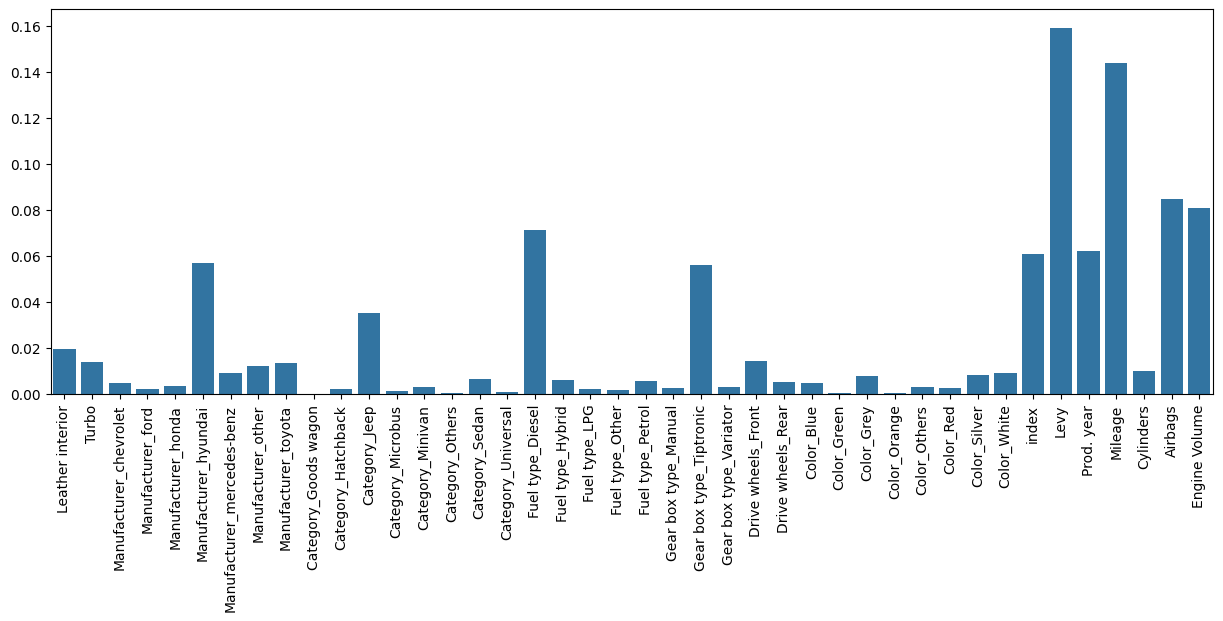

In [103]:
plt.figure(figsize=(15,5))
sns.barplot(x=rforest.feature_names_in_,y=rforest.feature_importances_)
plt.xticks(rotation=90)
plt.show()